In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast

In [3]:
ribs = pd.read_csv("/mnt/shared_drive/data/brain_therapy/SMA03/SMA-3_Test_Data_Trond.csv")

In [4]:
ribs

,blobtype_name,sensorblob_description,sensorblob_payload
0,RSP Level,NaN,"[0.53558349609375,0.5351715087890625,0.5345611..."
1,ECG Level,NaN,"[0.5615692138671875,0.5667572021484375,0.57156..."
2,EDA Level,NaN,"[1.99066162109375,1.990966796875,1.99096679687..."
3,Skin Temperature,SKT2,"[-9.5135498046875,-9.51385498046875,-9.5135498..."
4,Skin Temperature,SKT1,"[-0.66619873046875,-0.66558837890625,-0.666503..."
5,PPG Level,NaN,"[0.425506591796875,0.426910400390625,0.4281005..."


In [5]:
ribs["sensor"] = ["RSP", "ECG", "EDA", "SKT1", "SKT2","PPG"]
Fs = 500 # sampling rate

In [6]:
data1 = ast.literal_eval(ribs.iloc[5]["sensorblob_payload"])

## Whole Signal Plot

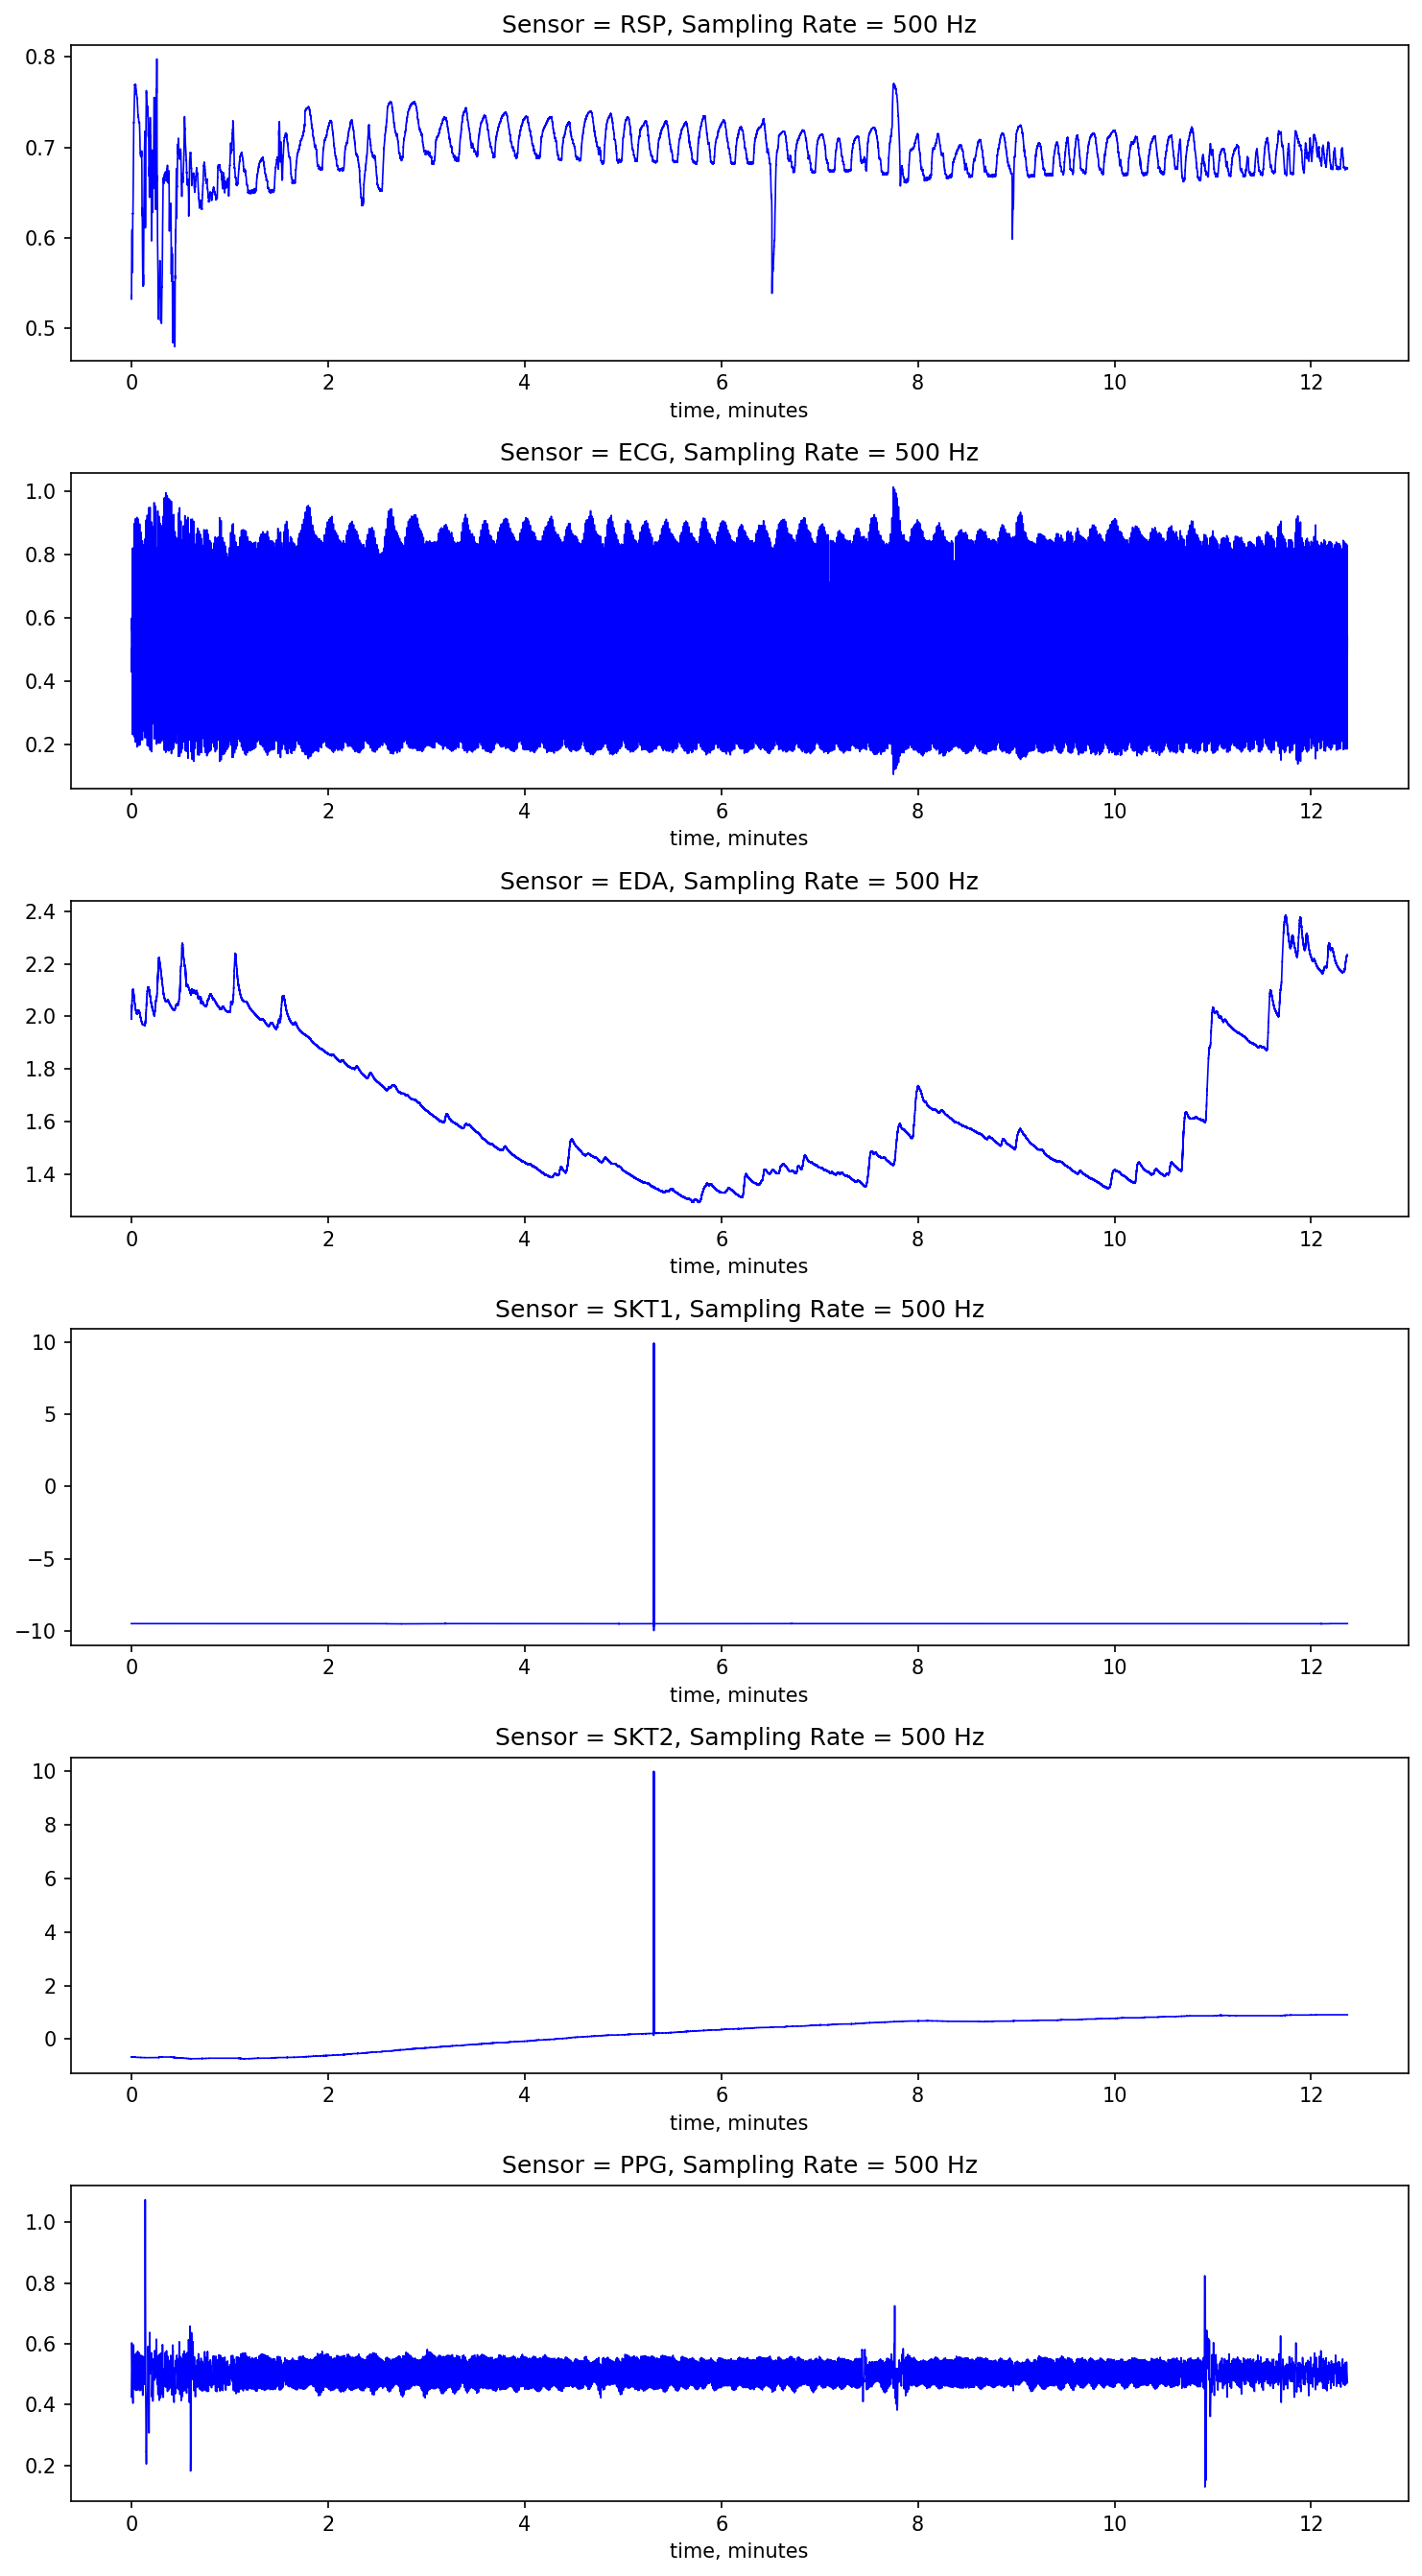

In [7]:
fig, axes = plt.subplots(6,1, figsize=(10,18), dpi = 150)
ax = axes.flatten()
for i in range(6):

    data = ast.literal_eval(ribs.iloc[i]["sensorblob_payload"])
    time_ = np.arange(0,len(data)/(Fs),1/Fs)
    ax[i].plot(time_/60, data, color = 'blue', lw=0.8)
    ax[i].set_xlabel("time, minutes")
    ax[i].set_title("Sensor = {}, Sampling Rate = {} Hz".format(ribs.iloc[i]["sensor"],Fs))
plt.tight_layout()
plt.show()

## Zoomed in Signal Plots

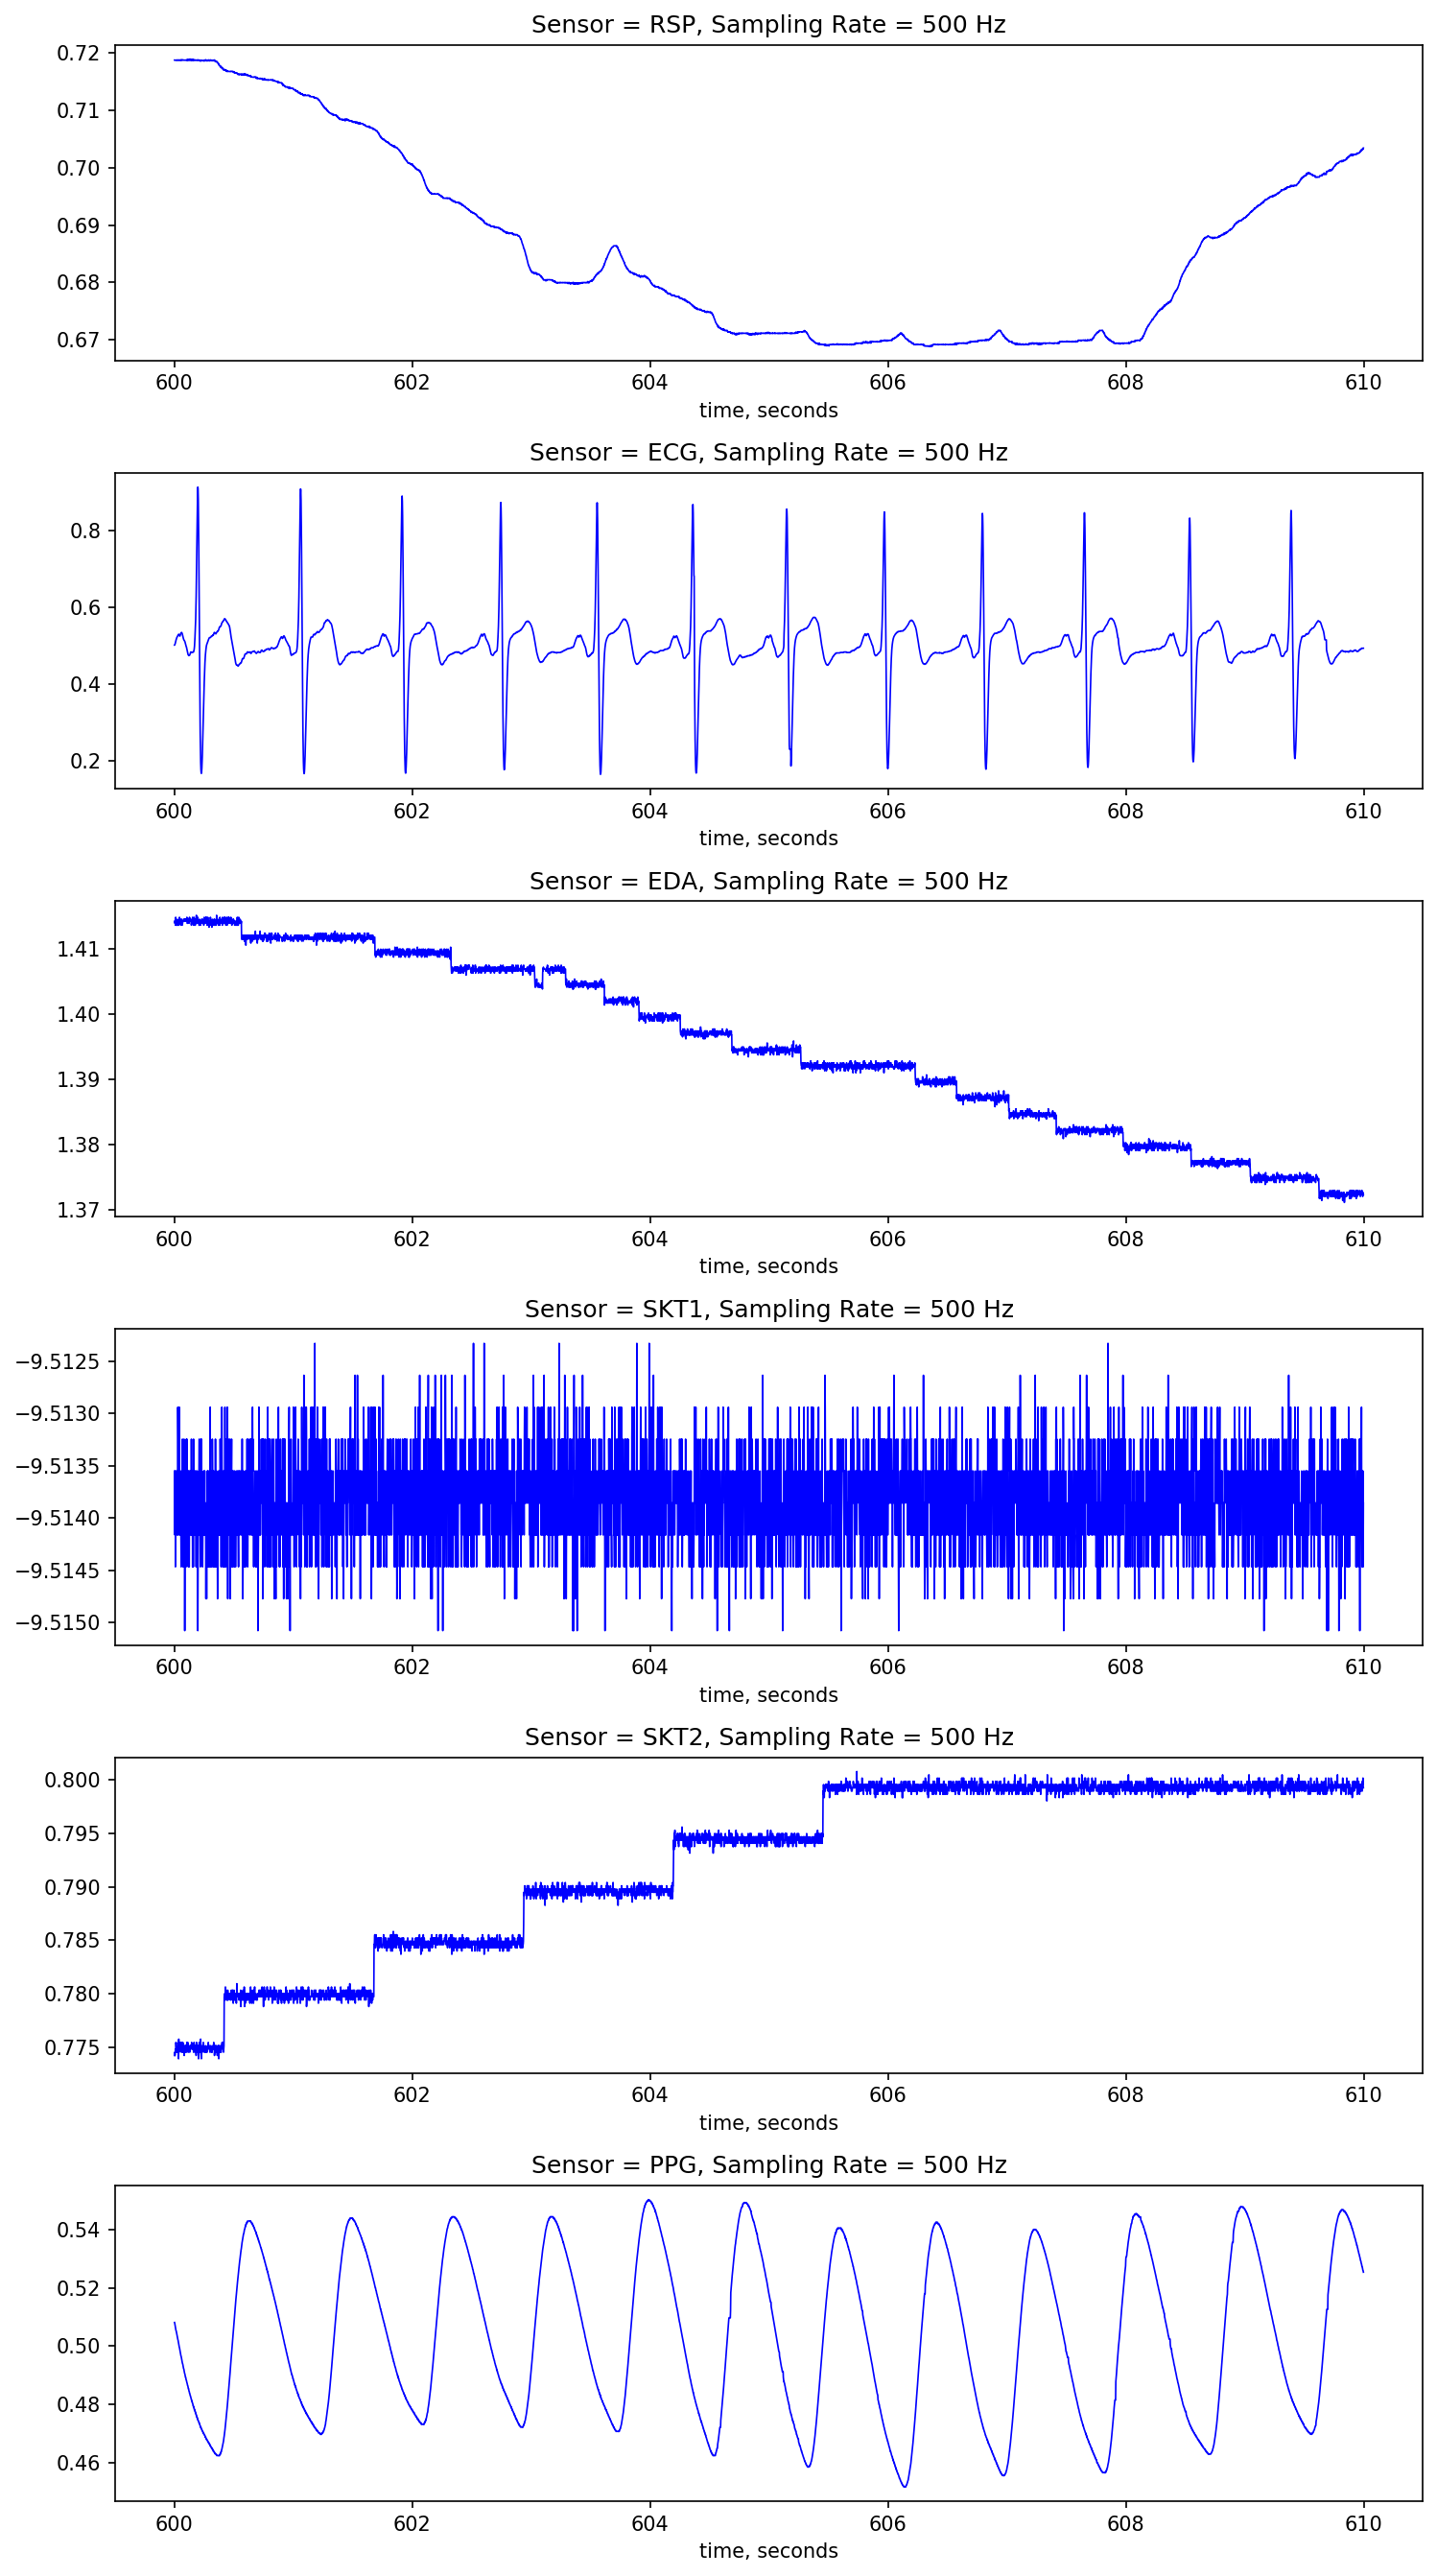

In [8]:
fig, axes = plt.subplots(6,1, figsize=(10,18), dpi = 150)
ax = axes.flatten()
for i in range(6):
    
    data = ast.literal_eval(ribs.iloc[i]["sensorblob_payload"])
    time_ = np.arange(0,len(data)/(Fs),1/Fs)
    
    data2 = data[Fs*60*10:Fs*60*10+Fs*10]
    time_2 = time_[Fs*60*10:Fs*60*10+Fs*10]
    ax[i].plot(time_2, data2, color = 'blue', lw=0.8)
    ax[i].set_title("Sensor = {}, Sampling Rate = {} Hz".format(ribs.iloc[i]["sensor"],Fs))
    ax[i].set_xlabel("time, seconds")
plt.tight_layout()
plt.show()